1.5
last 0.33554708877983963 0.33465351188952697 0.33333288871105776
r_min -6.0


"plt.figure()\nplt.plot(R,np.array(Var_j)/np.array(J0)**2)\nplt.xlabel('r')\nplt.ylabel(r'$\x0crac{(\\mathrm{Var}(j))}{(\\langle j \rangle)}$')"

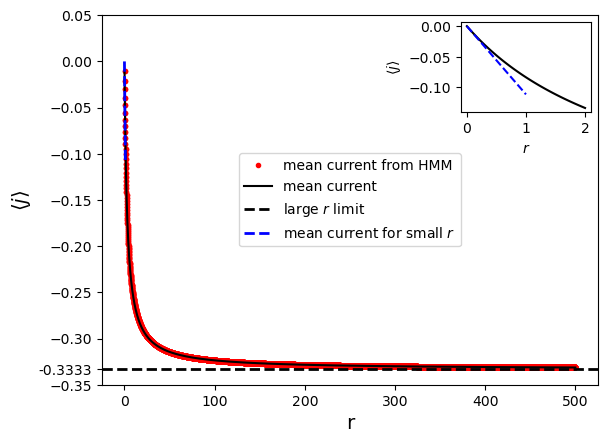

In [2]:
#Fig.4 hypoexponential-exponential ratchet 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy as sp


p1=1
p2=2
q=(p1*p2)/(p1+p2)
print(1/q)
R=np.arange(0.1,500,0.1)


def get_Matrix(s,r):
    k=s
    M=np.zeros((9,9))
    
    
    M[0,0]= -p1-r
    M[0,1]=  p1
    M[0,6] = r
    
    M[1,1] = -p2-r
    M[1,2] =  p2* np.exp(k)
    M[1,6]=  r 
    
    M[2,2]= -p1-r
    M[2,3]=  p1
    M[2,7] = r
    
    M[3,3] =-p2-r
    M[3,4] = p2 * np.exp(k)
    M[3,7]=r  
    
    M[4,4] = -p1-r
    M[4,5] = p1 
    M[4,8] = r
    
    
    M[5,5] = -p2-r
    M[5,0] = p2* np.exp(k)
    M[5,8] = r
    
    ####rev
    M[6,0] = r 
    M[6,8] = q *np.exp(-k)
    M[6,6] = -q-r    
    
    M[7,7] = -q-r 
    M[7,2]=r
    M[7,6] =q  * np.exp(-k)
    
    
    
    M[8,8] = -q-r
    M[8,7] = q*np.exp(-k)
    M[8,4]= r
     
    return M


Var_j=[]
Var_j_numerics=[]
mean_j_numerics=[]
h=0.0001
J0 = []
Var_large_1=[]
Var_full = []
for r in R:
         M = get_Matrix(0,r)
         M1 = get_Matrix(0+h,r)
         M2 = get_Matrix(0-h,r)
         w,v  = np.linalg.eig((M))
         w1,v1 = np.linalg.eig((M1))
         w2,v2 = np.linalg.eig((M2))
         scgf_x= np.real(np.max(w))     
         scgf_x_p_h= np.real(np.max(w1))
         scgf_x_m_h= np.real(np.max(w2))
         Var_j_numerics.append((scgf_x_p_h - (2*scgf_x) + scgf_x_m_h)/h**2)
         mean_j_numerics.append((scgf_x_p_h-scgf_x_m_h)/(2*h))
         J0.append((-q*r) / (2*(p1+p2+r)))
         var_t = ((p1**2+p2**2)/(p1*p2)**2)
         var_b_t=1/(q**2)
         mu_t = (p1+p2)/(p1*p2)
         #lamda_2=((var_t+var_b_t)/(r*(mu_t)**3))+ ((var_t-var_b_t)/ (2*(mu_t)**2))**2 + 2/((mu_t*r)**2)
         lamda_1= (var_t-var_b_t)/ (2*(mu_t)**2)
         c_11 = (1/r)*((var_t-var_b_t)/ (mu_t)**2)
         mu_1= 2/r
         mu_2 = 6/(r**2)
         #var_j= ((mu_1)**(-3)*(mu_2)*(lamda_1**2)) - (2* (mu_1)**(-2)*(c_11)*(lamda_1))+((mu_1)**(-1) * lamda_2)
         var_j = (1/4)*(r * lamda_1**2)+(1/r)*(1/mu_t**2) + ((var_t+var_b_t)/(2*(mu_t)**3))
         Var_j.append(var_j)
         Var_large_1.append((q/2)-(q/(2*r))**2)
         psi_r = (p2*p1)/((r+p1)*(r+p2))
         psi_r_b = q/(r+q)
         psi_sum = (psi_r+psi_r_b)/2
         Var_full.append((psi_sum*r) * (1-psi_sum)) 
print('last',Var_j_numerics[-1],Var_full[-1],Var_large_1[-1])
r_min = -(4* (1/q))/(((p1**2+p2**2)/(p1*p2)**2)-(1/q**2))
print("r_min",(4* (1/q))/(((p1**2+p2**2)/(p1*p2)**2)-(1/q**2)))


#print(R,Var_j)
 
'''plt.semilogx(R,Var_j_numerics,'.r',label='numerical result')
#plt.semilogx(R,((q/2)*np.ones(len(R))),'k',label='large r limit')
plt.semilogx(R,Var_full,'--g',label=r'large $r$: laplace transform')
plt.semilogx(R,Var_large_1,'--m', label=r'large $r$ limit')
plt.semilogx(R,Var_j,'--b',label=r'small $r$')
#plt.semilogx(r_min,(1/4)*(r_min * lamda_1**2)+(1/r_min)*(1/mu_t**2) + ((var_t+var_b_t)/(2*(mu_t)**3)), 'xr')
plt.ylabel(r'$\lim_{t \to \infty} \frac{\mathrm{Var}(J)}{t}$')
plt.xlabel(r'$r$')
plt.ylim(0,6)
#plt.ylabel(r'$\lim_{t \to \infty}\frac{\mathrm{Var}(J)}{t}$')
plt.legend()
'''
'''plt.figure()
plt.semilogx(R,np.abs(np.array(Var_j_numerics)-np.array(Var_full)),'--g',label='large r error: laplace transform')
plt.semilogx(R,np.abs(np.array(Var_j_numerics)-np.array(Var_large_1)),'--b',label='large r error: Taylor expansion')
plt.legend()
plt.grid()
plt.figure()
plt.figure()'''

R1=np.arange(0.001,2.02,0.02)
R2=np.arange(0.001,1.02,0.02)
rr=[]
J1=[]
for r in R1:
    J1.append((-q*r) / (2*(p1+p2+r)))
    
for r in R2:    
     rr.append(-(p1*p2*r)/(2*(p1+p2)**2))
    

fig, ax = plt.subplots(1, 1)
ax.plot(R,mean_j_numerics,'.r',label='mean current from HMM')
#plt.plot(R,J0,'-k')
axins = inset_axes(ax, width=1.3, height=0.9)
ax.plot(R,mean_j_numerics,'.r')
ax.plot(R,J0,'-k',label='mean current')
#ax.plot(R,(-q/2)*np.ones((len(J0))),'--k',linewidth=2,label=r'large $r$ limit')
ax.axhline(y=-q/2, color='k',ls='--',lw=2, label=r'large $r$ limit')
ax.plot(R2,rr,'--b',linewidth=2,label=r'mean current for small $r$')
yticks = [*ax.get_yticks(),round(-q/2,4)]
yticklabels = [*ax.get_yticklabels(),round(-q/2,4)]
ax.set_yticks(yticks, labels=yticklabels)
axins.plot(R1,J1,'k')
axins.plot(R2,rr,'--b')
axins.set_ylabel(r'$\langle j \rangle$' )
axins.set_xlabel(r'$r$')
ax.set_xlabel('r',fontsize='x-large')
ax.set_ylabel(r'$\langle j \rangle$',fontsize='x-large')
ax.legend(loc='center')
'''plt.figure()
plt.plot(R,np.array(Var_j)/np.array(J0)**2)
plt.xlabel('r')
plt.ylabel(r'$\frac{(\mathrm{Var}(j))}{(\langle j \rangle)}$')'''
#print(Var_j)
#plt.plot(R,Var_j)

In [ ]:
#Fig 4: hyperxponential-exponential ratchet 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy as sp


p1=1
p2=2
q=(p1*p2)/(p1+p2)
print(1/q)
R=np.arange(0.1,500,0.1)


def get_Matrix(s,r):
    k=s
    M=np.zeros((9,9))
    
    
    M[0,0]= -p1-r
    M[0,1]=  p1
    M[0,6] = r
    
    M[1,1] = -p2-r
    M[1,2] =  p2* np.exp(k)
    M[1,6]=  r 
    
    M[2,2]= -p1-r
    M[2,3]=  p1
    M[2,7] = r
    
    M[3,3] =-p2-r
    M[3,4] = p2 * np.exp(k)
    M[3,7]=r  
    
    M[4,4] = -p1-r
    M[4,5] = p1 
    M[4,8] = r
    
    
    M[5,5] = -p2-r
    M[5,0] = p2* np.exp(k)
    M[5,8] = r
    
    ####rev
    M[6,0] = r 
    M[6,8] = q *np.exp(-k)
    M[6,6] = -q-r    
    
    M[7,7] = -q-r 
    M[7,2]=r
    M[7,6] =q  * np.exp(-k)
    
    
    
    M[8,8] = -q-r
    M[8,7] = q*np.exp(-k)
    M[8,4]= r
     
    return M


Var_j=[]
Var_j_numerics=[]
mean_j_numerics=[]
h=0.0001
J0 = []
Var_large_1=[]
Var_full = []
for r in R:
         M = get_Matrix(0,r)
         M1 = get_Matrix(0+h,r)
         M2 = get_Matrix(0-h,r)
         w,v  = np.linalg.eig((M))
         w1,v1 = np.linalg.eig((M1))
         w2,v2 = np.linalg.eig((M2))
         scgf_x= np.real(np.max(w))     
         scgf_x_p_h= np.real(np.max(w1))
         scgf_x_m_h= np.real(np.max(w2))
         Var_j_numerics.append((scgf_x_p_h - (2*scgf_x) + scgf_x_m_h)/h**2)
         mean_j_numerics.append((scgf_x_p_h-scgf_x_m_h)/(2*h))
         J0.append((-q*r) / (2*(p1+p2+r)))
         var_t = ((p1**2+p2**2)/(p1*p2)**2)
         var_b_t=1/(q**2)
         mu_t = (p1+p2)/(p1*p2)
         #lamda_2=((var_t+var_b_t)/(r*(mu_t)**3))+ ((var_t-var_b_t)/ (2*(mu_t)**2))**2 + 2/((mu_t*r)**2)
         lamda_1= (var_t-var_b_t)/ (2*(mu_t)**2)
         c_11 = (1/r)*((var_t-var_b_t)/ (mu_t)**2)
         mu_1= 2/r
         mu_2 = 6/(r**2)
         #var_j= ((mu_1)**(-3)*(mu_2)*(lamda_1**2)) - (2* (mu_1)**(-2)*(c_11)*(lamda_1))+((mu_1)**(-1) * lamda_2)
         var_j = (1/4)*(r * lamda_1**2)+(1/r)*(1/mu_t**2) + ((var_t+var_b_t)/(2*(mu_t)**3))
         Var_j.append(var_j)
         Var_large_1.append((q/2)-(q/(2*r))**2)
         psi_r = (p2*p1)/((r+p1)*(r+p2))
         psi_r_b = q/(r+q)
         psi_sum = (psi_r+psi_r_b)/2
         Var_full.append((psi_sum*r) * (1-psi_sum)) 
print('last',Var_j_numerics[-1],Var_full[-1],Var_large_1[-1])
r_min = -(4* (1/q))/(((p1**2+p2**2)/(p1*p2)**2)-(1/q**2))
print("r_min",(4* (1/q))/(((p1**2+p2**2)/(p1*p2)**2)-(1/q**2)))


#print(R,Var_j)
 
plt.semilogx(R,Var_j_numerics,'.r',label='numerical result')
#plt.semilogx(R,((q/2)*np.ones(len(R))),'k',label='large r limit')
plt.semilogx(R,Var_full,'--g',label=r'large $r$: laplace transform')
plt.semilogx(R,Var_large_1,'--m', label=r'large $r$ limit')
plt.semilogx(R,Var_j,'--b',label=r'small $r$')
#plt.semilogx(r_min,(1/4)*(r_min * lamda_1**2)+(1/r_min)*(1/mu_t**2) + ((var_t+var_b_t)/(2*(mu_t)**3)), 'xr')
plt.ylabel(r'$\lim_{t \to \infty} \frac{\mathrm{Var}(J)}{t}$')
plt.xlabel(r'$r$')
plt.ylim(0,6)
#plt.ylabel(r'$\lim_{t \to \infty}\frac{\mathrm{Var}(J)}{t}$')
plt.legend()
'''plt.figure()
plt.semilogx(R,np.abs(np.array(Var_j_numerics)-np.array(Var_full)),'--g',label='large r error: laplace transform')
plt.semilogx(R,np.abs(np.array(Var_j_numerics)-np.array(Var_large_1)),'--b',label='large r error: Taylor expansion')
plt.legend()
plt.grid()
plt.figure()'''
plt.figure()

R1=np.arange(0.001,2.02,0.02)
R2=np.arange(0.001,1.02,0.02)
rr=[]
J1=[]
for r in R1:
    J1.append((-q*r) / (2*(p1+p2+r)))
    
for r in R2:    
     rr.append(-(p1*p2*r)/(2*(p1+p2)**2))
    

fig, ax = plt.subplots(1, 1)
ax.plot(R,mean_j_numerics,'.r',label='mean current from HMM')
#plt.plot(R,J0,'-k')
axins = inset_axes(ax, width=1.3, height=0.9)
ax.plot(R,mean_j_numerics,'.r')
ax.plot(R,J0,'-k',label='mean current')
#ax.plot(R,(-q/2)*np.ones((len(J0))),'--k',linewidth=2,label=r'large $r$ limit')
ax.axhline(y=-q/2, color='k',ls='--',lw=2, label=r'large $r$ limit')
ax.plot(R2,rr,'--b',linewidth=2,label=r'mean current for small $r$')
yticks = [*ax.get_yticks(),round(-q/2,4)]
yticklabels = [*ax.get_yticklabels(),round(-q/2,4)]
ax.set_yticks(yticks, labels=yticklabels)
axins.plot(R1,J1,'k')
axins.plot(R2,rr,'--b')
axins.set_ylabel(r'$\langle j \rangle$' )
axins.set_xlabel(r'$r$')
ax.set_xlabel('r',fontsize='x-large')
ax.set_ylabel(r'$\langle j \rangle$',fontsize='x-large')
ax.legend(loc='center')
'''plt.figure()
plt.plot(R,np.array(Var_j)/np.array(J0)**2)
plt.xlabel('r')
plt.ylabel(r'$\frac{(\mathrm{Var}(j))}{(\langle j \rangle)}$')'''
#print(Var_j)
#plt.plot(R,Var_j)

In [ ]:
#Fig 5: Two-side gamma ratchet
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp



R=np.arange(0.1,20,0.1)

p1=1
a1=2
a2=3
p2 =(a2/a1)*p1

def get_Matrix(s,r):
    k=s
    M=np.zeros((15,15))
    
    
    M[0,0]= -p1-r
    M[0,1]=  p1
    M[0,6] = r
    
    M[1,1] = -p1-r
    M[1,2] =  p1* np.exp(k)
    M[1,6]=  r 
    
    M[2,2]= -p1-r
    M[2,3]=  p1
    M[2,9] = r
    
    M[3,3] =-p1-r
    M[3,4] = p1 * np.exp(k)
    M[3,9]=r  
    
    M[4,4] = -p1-r
    M[4,5] = p1 
    M[4,12] = r
    
    
    M[5,5] = -p1-r
    M[5,0] = p1* np.exp(k)
    M[5,12] = r
    
    ####rev
    M[6,0] = r 
    M[6,7] = p2 
    M[6,6] = -p2-r
    
    M[7,0] = r 
    M[7,8] = p2 
    M[7,7] = -p2-r    

    M[8,0] = r 
    M[8,12] = p2 *np.exp(-k)
    M[8,8] = -p2-r 

    M[9,2] = r 
    M[9,10] = p2 
    M[9,9] = -p2-r
    
    M[10,2] = r 
    M[10,11] = p2 
    M[10,10] = -p2-r    

    M[11,2] = r 
    M[11,6] = p2 *np.exp(-k)
    M[11,11] = -p2-r 
    
    M[12,4] = r 
    M[12,13]=p2
    M[12,12] =-p2-r 

    M[13,13] = -p2-r 
    M[13,14]=p2
    M[13,4] =r 

    M[14,14] = -p2-r 
    M[14,9]=p2 *np.exp(-k)
    M[14,4] =r 
    
    
    return M
    
Var_j=[]
Var_j_numerics=[]
mean_j_numerics=[]
h=0.0001
J0 = []
for r in R:
         M = get_Matrix(0,r)
         M1 = get_Matrix(0+h,r)
         M2 = get_Matrix(0-h,r)
         w,v  = np.linalg.eig((M))
         w1,v1 = np.linalg.eig((M1))
         w2,v2 = np.linalg.eig((M2))
         scgf_x= np.real(np.max(w))     
         scgf_x_p_h= np.real(np.max(w1))
         scgf_x_m_h= np.real(np.max(w2))
         Var_j_numerics.append(((scgf_x_p_h - (2*scgf_x) + scgf_x_m_h)/h**2))
         mean_j_numerics.append((scgf_x_p_h-scgf_x_m_h)/(2*h))
         A = (p1**(a1))/(((p1+r)**a1)-(p1**a1))
         B = (p2**(a2))/(((p2+r)**a2)-(p2**a2))
         J0.append(0.5*r*(A-B))
         var_t = a1/(p1**2)
         var_b_t=a2/(p2**2)
         mu_t = a1/p1
         lamda_2=((var_t+var_b_t)/(r*(mu_t)**3))+ ((var_t-var_b_t)/ (2*(mu_t)**2))**2 + 2/((mu_t*r)**2)
         #lamda_2=((var_t+var_b_t)/(r*(mu_t)**3))+  (2/(mu_t*r)**2) + ((A-B))**2
         lamda_1= (var_t-var_b_t)/ (2*(mu_t)**2)
         #lamda_1= A-B
         c_11 = (1/r)*((var_t-var_b_t)/ (mu_t)**2)
         #c_11 =(2/r)*(A-B)
         mu_1= 2/r
         mu_2 = 6/(r**2)
         var_j = ((1/4)*(r * lamda_1**2))+ ((1/r)*(1/mu_t**2)) + ((var_t+var_b_t)/(2*(mu_t)**3))
         Var_j.append(var_j)  

         

print("r_min",(4* (mu_t))/(var_t-var_b_t))
r_min = (4* (mu_t))/(var_t-var_b_t)
#r_large= 
#print(R,Var_j)
#plt.plot(R,Var_j_numerics,'--b')
#plt.plot(R,Var_j,'--k')
#plt.plot(r_min,(1/4)*(r_min * lamda_1**2)+(1/r_min)*(1/mu_t**2) + ((var_t+var_b_t)/(2*(mu_t)**3)), 'xr')
plt.figure()
plt.plot(R,mean_j_numerics,'.r',label='mean current from HMM')
plt.plot(R,J0,'-k',label='mean current')
plt.xlabel(r'$r$',fontsize='x-large')
plt.ylabel(r'$\langle j \rangle$',fontsize='x-large')
plt.legend()

'''plt.figure()
plt.plot(R,(np.array(J0)**2)/np.array(Var_j))
plt.plot(R,(np.array(mean_j_numerics)**2)/np.array(Var_j_numerics),'xr')'''

#print(Var_j)
#plt.plot(R,Var_j)

In [ ]:
#Fig 6: Mittag-Leffler ratchet

import numpy as np
import matplotlib.pyplot as plt

R = np.arange(1e-8, 2.0, 0.01)
alpha_1 = 0.5
alpha_2 = 0.75
lamda1 = 1.0
lamda2 = 1.0
T = 500.0
n_traj = 2000      
block = 20000     

rng = np.random.default_rng(12345)  # reproducible

def positive_stable_subordinator(alpha, size, rng):
    if not (0 < alpha < 1):
        if alpha == 1:
            return np.ones(size)
        raise ValueError("alpha must be in (0,1].")

    U = rng.uniform(0.0, np.pi, size=size)
    E = rng.exponential(1.0, size=size)
    return (np.sin(alpha * U) / (np.sin(U) ** (1.0 / alpha))) * \
           ((np.sin((1.0 - alpha) * U) / E) ** ((1.0 - alpha) / alpha))

def mittag_leffler_rvs(alpha, lam, size, rng):
    E_lam = rng.exponential(scale=1.0 / lam, size=size)  # Exp(rate=lam)
    S = positive_stable_subordinator(alpha, size=size, rng=rng)
    return S * (E_lam ** (1.0 / alpha))


c = np.empty_like(R, dtype=float)

for k, r in enumerate(R):
    total_i = 0.0
    total_t = 0.0

    for _ in range(n_traj):
        t = 0
        i = 0
        d = 1  
        ml1 = mittag_leffler_rvs(alpha_1, lamda1, block, rng); p1 = 0
        ml2 = mittag_leffler_rvs(alpha_2, lamda2, block, rng); p2 = 0
        sw  = rng.exponential(scale=1.0 / r, size=block);      p3 = 0

        while t < T:
            if p1 >= block:
                ml1 = mittag_leffler_rvs(alpha_1, lamda1, block, rng); p1 = 0
            if p2 >= block:
                ml2 = mittag_leffler_rvs(alpha_2, lamda2, block, rng); p2 = 0
            if p3 >= block:
                sw = rng.exponential(scale=1.0 / r, size=block); p3 = 0

            t2 = sw[p3]; p3 += 1

            if d == 1:
                t1 = ml1[p1]; p1 += 1
                if t1 < t2:
                    i += 1
                    t += t1
                else:
                    t += t2
                    d = 0
            else:
                t1 = ml2[p2]; p2 += 1
                if t1 < t2:
                    i -= 1
                    t += t1
                else:
                    t += t2
                    d = 1

        total_i += i
        total_t += t

    c[k] = total_i / total_t  


psi1 = lamda1 / (lamda1 + (R ** alpha_1))
psi2 = lamda2 / (lamda2 + (R ** alpha_2))
mean_current = (R / 2.0) * ((psi1 / (1.0 - psi1)) - (psi2 / (1.0 - psi2)))

r_change = 1.0
zero = (r_change / 2.0) * (-(1.0 / (r_change ** alpha_1)) + (1.0 / (r_change ** alpha_2)))
print("zero at r=1:", zero)

plt.plot(R, mean_current, 'k', label='analytical mean current')

plt.plot(R, c, '.b', label="simulation")
plt.plot(r_change, zero, 'xr', label='current reversal point')
plt.axvline(x=1, color='r', ls='--', lw=0.5)
plt.axhline(y=0, color='r', ls='--', lw=0.5)
plt.legend()
plt.xlabel(r'$r$', fontsize='x-large')
plt.ylabel(r'$\langle j \rangle$', fontsize='x-large')
plt.show()


In [ ]:
# Fig. 7: Plotting hypoexponential-exponential ratchet current fluctuations (data from corresponding mathematica file) 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
p1=1
p2=2
q=(p1*p2)/(p1+p2)
print(1/q)
#R=np.arange(0.1,50,0.1)
r=1
r1=1000

def get_Matrix(s,r):
    k=s
    M=np.zeros((9,9))
    
    
    M[0,0]= -p1-r
    M[0,1]=  p1
    M[0,6] = r
    
    M[1,1] = -p2-r
    M[1,2] =  p2* np.exp(k)
    M[1,6]=  r 
    
    M[2,2]= -p1-r
    M[2,3]=  p1
    M[2,7] = r
    
    M[3,3] =-p2-r
    M[3,4] = p2 * np.exp(k)
    M[3,7]=r  
    
    M[4,4] = -p1-r
    M[4,5] = p1 
    M[4,8] = r
    
    
    M[5,5] = -p2-r
    M[5,0] = p2* np.exp(k)
    M[5,8] = r
    
    ####rev
    M[6,0] = r 
    M[6,8] = q *np.exp(-k)
    M[6,6] = -q-r    
    
    M[7,7] = -q-r 
    M[7,2]=r
    M[7,6] =q  * np.exp(-k)

    M[8,8] = -q-r
    M[8,7] = q*np.exp(-k)
    M[8,4]= r
     
    return M
    




biases=np.arange(-3,3.2,0.2)
biases_b=np.arange(-3,3.2,0.2)
scgf = []
scgf2 = []
scgf_small_r=[]
scgf_small_r_inset=[]
for bias in biases:
    #LL= (rl_02+ rr_02) * (r0/(bias+r0))**2 + (rl_03+ rr_03) * (r0/(bias+r0))**2
    #LR= (rl_12+ rr_12) * (r1/(bias+r1))**2 + (rl_13+ rr_13) * (r1/(bias+r1))**2
  
    #M = get_Matrix(bias,r1)
    #w,v  = np.linalg.eig((M))
    M1 = get_Matrix(bias,r)
    w1,v1  = np.linalg.eig((M1))
    scgf_small_r.append(np.real(np.max(w1)))
    #scgf_large_r.append(np.real(np.max(w)))

for bias in biases_b:
    #LL= (rl_02+ rr_02) * (r0/(bias+r0))**2 + (rl_03+ rr_03) * (r0/(bias+r0))**2
    #LR= (rl_12+ rr_12) * (r1/(bias+r1))**2 + (rl_13+ rr_13) * (r1/(bias+r1))**2
  
    #M = get_Matrix(bias,r1)
    #w,v  = np.linalg.eig((M))
    M1 = get_Matrix(bias,r)
    w1,v1  = np.linalg.eig((M1))
    scgf_small_r_inset.append(np.real(np.max(w1)))
    #scgf_large_r.append(np.real(np.max(w)))
    


#df=pd.read_csv("roots_table_r_1000.csv")
df1=pd.read_csv("roots_table_r_1_A.csv")
df2=pd.read_csv("roots_table_r_1_B.csv")
df3=pd.read_csv("roots_table_r_1.csv")


y3=list(df3['s'])


#print("y3",y3)
y=list(df['s'])
y1=list(df1['s'])
y2=list(df2['s'])

#print(y[0])
#print(y1[0])
#print(y2[0])

y2=np.array(y2)
y1=np.array(y1)
y2[y2<-r]=-r
y1[y1<-r]=-r
fig, ax = plt.subplots(1, 1)

#axins = inset_axes(ax, width=1.3, height=0.9)
ax.plot(biases,y3,'k',label=r'$\nu_{*}$')
ax.plot(biases,y1,'b',label=r'$\nu^{+}_{*}$')
ax.plot(biases,y2,'g',label=r'$\nu^{-}_{*}$')
#plt.plot(biases,y1,'k',label='From PS')
#print(len(y1),len(scgf_small_r))

ax.plot(biases,scgf_small_r,'.r',label="SCGF from HMM")
#ax.plot(biases,y3[5:26],'.r',label="renewal framework")
ax.set_xlabel(r"$s$", fontsize="x-large")
ax.set_ylabel(r"$\nu(s)$",fontsize="x-large")
yticks = [*ax.get_yticks(),-r]
yticklabels = [*ax.get_yticklabels(),-r]
ax.set_yticks(yticks, labels=yticklabels)
#plt.title("p2=2,p1=1,$r$=0.5")
#ax.set_title("Hypoexponential/exponential ratchet")
#plt.grid()
ax.legend(loc="center")
#ax.figure()
#axins.plot(biases_b,scgf_small_r_inset,'.r')
#axins.plot(biases_b,y3_b,'k')
#axins.plot(biases_b,y1_b,'b')
#axins.plot(biases_b,y2_b,'g')

#print("diff",np.array(y3)-np.array(y2))
axins.set_xlabel(r'$s$' )
axins.set_ylabel(r'$\nu$')
'''plt.plot(biases,y1)
plt.plot(biases,y2)
plt.plot(biases,y3,'k')

#print(y1)
#print(y2)
#print(y3)
plt.ylabel(r'$\lambda(s)$')
plt.xlabel(r'$s$')
#plt.title(r'hypoexponential-expoenential ratchet, $r=1$')'''

In [ ]:
# Fig. 7: Plotting hyperexponential-exponential ratchet current fluctuations (data from corresponding mathematica file)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import pandas as pd

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
p1=1
p2=2
q=(2*p1*p2)/(p1+p2)
print(1/q)
#R=np.arange(0.1,50,0.1)
r=1


def get_Matrix(s,r):
    M=np.zeros((9,9))
    
    
    M[0,0]= -p1 - r 
    M[0,2]=  (p1/2)*  np.exp(s)
    M[0,3] = (p1/2) * np.exp(s) 
    M[0,6] = r 
    
    
    M[1,1]= -p2-r
    M[1,2]=  (p2/2)*np.exp(s)
    M[1,3]=   (p2/2) * np.exp(s)
    M[1,6] = r
    
    M[2,2]= -p1-r
    M[2,4]=  (p1/2)*np.exp(s)
    M[2,5] = (p1/2) * np.exp(s)
    M[2,7] = r 
    
    M[3,3]= - p2-r
    M[3,4]= (p2/2)*np.exp(s)
    M[3,5]= (p2/2) * np.exp(s)
    M[3,7]= r
    
    M[4,4]= -p1-r
    M[4,0]=  (p1/2)*np.exp(s)
    M[4,1] = (p1/2) * np.exp(s)
    M[4,8] = r 
    
    M[5,5]= - (p2)-r
    M[5,0]= (p2/2)*np.exp(s)
    M[5,1]= (p2/2) * np.exp(s)
    M[5,8]= r
    
        
    
    
    ####rev
    M[6,0] = r/2
    M[6,1] = r/2
    M[6,8] = q *np.exp(-s)
    M[6,6] = -q-r    
    
    M[7,7] = -q-r 
    M[7,2]=r/2
    M[7,3] = r/2
    M[7,6] =q  * np.exp(-s)

    
    M[8,8] = -q-r
    M[8,7] = q*np.exp(-s)
    M[8,4] =r/2
    M[8,5]= r/2 
    return M




biases=np.arange(-3,3.2,0.2)
scgf = []
scgf2 = []
scgf_small_r=[]
scgf_large_r=[]
for bias in biases:
    #LL= (rl_02+ rr_02) * (r0/(bias+r0))**2 + (rl_03+ rr_03) * (r0/(bias+r0))**2
    #LR= (rl_12+ rr_12) * (r1/(bias+r1))**2 + (rl_13+ rr_13) * (r1/(bias+r1))**2
  
    M = get_Matrix(bias,r)
    w,v  = np.linalg.eig((M))
    M1 = get_Matrix(bias,r)
    w1,v1  = np.linalg.eig((M1))
    scgf_small_r.append(np.real(np.max(w1)))
    scgf_large_r.append(np.real(np.max(w)))
    




#df=pd.read_csv("roots_table_r_1000.csv")
df1=pd.read_csv("roots_table_hyper_r_1_A.csv")
df2=pd.read_csv("roots_table_hyper_r_1_B.csv")
df3=pd.read_csv("roots_table_hyper_r_1.csv")

y3=list(df3['s'])
#y=list(df['s'])
y1=list(df1['s'])
y2=list(df2['s'])
#plt.plot(biases,y,'k')
#print(y[0])
print(y1[0])
print(y2[0])
y2=np.array(y2)
y1=np.array(y1)
y2[y2<-r]=-r
y1[y1<-r]=-r
#plt.plot(biases,scgf_large_r,'.r',label='numerical result')
#plt.plot(biases,y,'k',label='From PS')
#plt.ylabel(r'$\lambda(s)$')
#plt.xlabel(r'$s$')
#plt.title(r'hypoexponential-expoenential ratchet, $r=1000$')
#plt.figure()
fig, ax = plt.subplots(1, 1)
#axins = inset_axes(ax, width=1.3, height=0.9)
ax.plot(biases,y3,'k',label=r'$\nu_{*}$')
ax.plot(biases,y1,'b',label=r'$\nu^{+}_{*}$')
ax.plot(biases,y2,'g',label=r'$\nu^{-}_{*}$')

#plt.plot(biases,y1,'k',label='From PS')
#print(len(y1),len(scgf_small_r))

ax.plot(biases,scgf_small_r,'.r',label="SCGF from HMM")
#ax.plot(biases,y3[5:26],'.r',label="renewal framework")
ax.set_xlabel(r"$s$", fontsize="x-large")
ax.set_ylabel(r"$\nu(s)$",fontsize="x-large")
#plt.title("p2=2,p1=1,$r$=0.5")
#ax.set_title("Hypoexponential/exponential ratchet")
#plt.grid()
yticks = [*ax.get_yticks(),-r]
yticklabels = [*ax.get_yticklabels(),-r]
ax.set_yticks(yticks, labels=yticklabels,fontsize='small')
ax.legend(loc="center")
#ax.figure()
#axins.plot(biases_b,scgf_small_r_inset,'.r')
#axins.plot(biases_b,y3_b,'k')
#axins.plot(biases_b,y1_b,'b')
#axins.plot(biases_b,y2_b,'g')
print(y1)
print(y2)
print(np.array(y3)-np.array(y1))
axins.set_xlabel(r'$s$' )
axins.set_ylabel(r'$\nu(s)$')
#plt.plot(biases,scgf_small_r,'.r',label='numerical result')
#plt.plot(biases,y1,'k',label='From PS')
#plt.plot(biases,y1)
#plt.plot(biases,y2)
#plt.plot(biases,y3,'k')
print(y1)
print(y2)


#plt.ylabel(r'$\lambda(s)$')
#plt.xlabel(r'$s$')
#plt.title(r'hyperexponential-expoenential ratchet, $r=1000$')

"plt.plot(biases_b,y3_b,'k',label=r'$\nu_{*}$')\nplt.legend(loc='center')\nplt.xlabel(r'$s$')\nplt.ylabel(r'$\nu(s)$')"

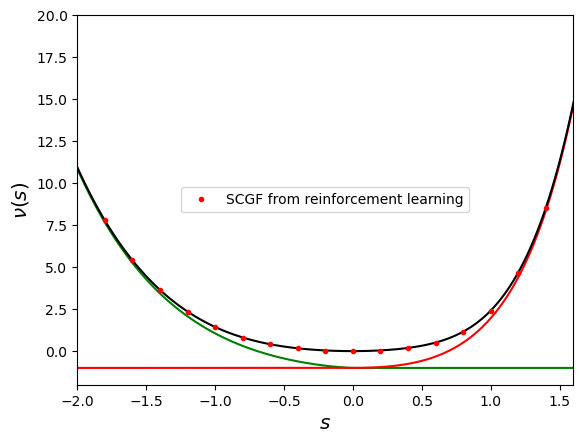

In [9]:

#Fig 8: Plotting Mittag-leffler with exponential reorintations ratchet current fluctuations (data from corresponding mathematica file )

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#biases1=np.arange(-3.8,2.2,0.2)
#biases= np.arange(-3.4,2,0.2)
biases1=np.arange(-3,3.02,0.02)
biases=np.arange(-3,3.02,0.02)
biases_b1= np.arange(0,2.2,0.2)
biases_b= np.arange(0,2,0.2)
#df=pd.read_csv("roots_table_r_mittag_0_001.csv")
#df3=pd.read_csv("roots_table_heavy_tailed_r_1_2.csv")
#df2=pd.read_csv("roots_table_heavy_tailed_r_1_2_B.csv")
#df1=pd.read_csv("roots_table_heavy_tailed_r_1_2_A.csv")
df3=pd.read_csv("roots_table_heavy_tailed_r_b_1_2.csv")
df2=pd.read_csv("roots_table_heavy_tailed_r_b_1_2_B.csv")
df1=pd.read_csv("roots_table_heavy_tailed_r_b_1_2_A.csv")


alpha1=0.5
alpha2=0.75
r=1

y1=list(df1['MaxrealRoot'])
y3=list(df3['MaxrealRoot'])
y2=list(df2['MaxrealRoot'])


#print(y2)
#plt.plot(biases1,y, 'xk')
#plt.axvline(x=0, color='k',ls='--',lw=0.5)
#plt.axhline(y=0, color='k',ls='--',lw=0.5)

#plt.figure()


'''for s in biases:
   nu1=(np.exp(s)-1)**(2)-r
   nu2=(np.exp(-s)-1)**(3)-r
   #nu3= ((np.exp(s)-1)**(2)-r)
   nu = -r
   print(nu1,nu2,nu)'''

#print("yy1",y1,"yy2",y2)
#print("yy3",y3_b)
#print("yy1", np.array(y3_b)-np.array(y2_b))
u=[]
'''for i in range(len(y1)):
   #print(y1[i],y2[i],y3[i]) 
   #print(np.max(np.array([y1[i],y2[i])))
   u.append(np.max(np.array([y1[i],y2[i],y3[i]])))'''


#plt.plot(biases,u)

#plt.plot(biases,y3,'k')

plt.plot(biases1,y2,'g')
plt.plot(biases1,y1,'r')
plt.plot(biases,y3,'k')

#fig, ax = plt.subplots(1, 1)
#axins = inset_axes(ax, width=1.3, height=0.9)
#print(y3_b)
#plt.plot(biases,y3_b,'k',label=r'$\nu_{*}$')
#plt.plot(biases,y1_b,'b',label=r'$\nu_{*}^{+}$',linewidth=2)
#plt.plot(biases,y2_b,'g',label=r'$\nu_{*}^{-}$',linewidth=2)
scgf_num= np.load('mittag_ratchet_1.npy')
biases_num=np.arange(-1.8,1.6,0.2)
plt.plot(biases_num,scgf_num,'.r',label="SCGF from reinforcement learning")
#plt.xlim(-1,1)
#plt.ylim(-1,50)
#j=(np.array(y3_b[1:])-np.array(y3_b[:-1]))/(0.02)
#I=(np.array(biases[:-1])*j)-np.array(y3_b[:-1]),y2)

#axins.plot(biases_b,np.max(np.array(y1_b),np.array(y_2)),'.r')


#plt.title(r'$r=1$')
plt.legend(loc='center')
plt.xlabel(r'$s$',fontsize='x-large')
plt.ylabel(r'$\nu(s)$',fontsize='x-large')
plt.xlim(-2,1.6)
plt.ylim(-2,20)
#plt.figure()
#plt.plot(j,I)
#plt.xlim(-10,1)
#plt.xlabel(r'$j$')
#plt.ylabel(r'$I(j)$')

#plt.figure()
#plt.plot(biases_b1,y1_b,'b',label=r'$\nu_{*}^{+}$')
#plt.plot(biases_b1,y2_b,'g',label=r'$\nu_{*}^{-}$')
'''plt.plot(biases_b,y3_b,'k',label=r'$\nu_{*}$')
plt.legend(loc='center')
plt.xlabel(r'$s$')
plt.ylabel(r'$\nu(s)$')'''
#plt.figure()
#plt.plot(biases1[0:100],np.array(y3_b)[0:100]-np.array(y2_b[0:100]))
#plt.plot(biases1,np.array(y3_b)-np.array(y1_b))
#plt.plot(biases1,np.array(y3_b)-np.array(y1_b))

In [4]:

#Fig 8: Python code to generate numerical data from reinforcement learning
#additional ML packages required: pytorch 

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical, Exponential, Gamma, MixtureSameFamily, Dirichlet, Normal
import numpy as np
from matplotlib import pyplot as plt
import time


# -------------------- config --------------------
hidden = 3
batch_size = 16
T = 50000
policy_clip = 0.2

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("here", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")


# -------------------- models --------------------
class Actor(nn.Module):
    def __init__(self):
        super(Actor, self).__init__()
        self.affine1 = nn.Linear(3, 32)
        self.affine2 = nn.Linear(32, 16)
        self.action_head_mov = nn.Linear(16, 2)
        self.log_probs = []

    def forward(self, x):
        x1 = torch.tanh(self.affine1(x))
        x2 = torch.tanh(self.affine2(x1))
        move_params = self.action_head_mov(x2)
        return F.softmax(move_params, dim=1)


class Critic(nn.Module):
    def __init__(self):
        super(Critic, self).__init__()
        self.affine1 = nn.Linear(3, 32)
        self.affine2 = nn.Linear(32, 16)
        self.critic_head = nn.Linear(16, 1)
        self.state_value = []

    def forward(self, x):
        x = torch.tanh(self.affine1(x))
        x = torch.tanh(self.affine2(x))
        state_value = self.critic_head(x)
        return state_value


class tau_Net(nn.Module):
    def __init__(self, hidden=3):
        super(tau_Net, self).__init__()
        self.hidden = hidden
        self.affine1 = nn.Linear(2, 16)
        self.action_head1 = nn.Linear(16, self.hidden)  # log_rates
        self.action_head2 = nn.Linear(16, self.hidden)  # log_concs
        self.action_head3 = nn.Linear(16, self.hidden)  # weights logits
        self.log_probs = []

    def forward(self, x):
        x1 = torch.tanh(self.affine1(x))
        rates = self.action_head1(x1)
        concs = self.action_head2(x1)
        weights = self.action_head3(x1)
        return rates, concs, F.softmax(weights, dim=1)


def weights_init_uniform(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.1)


def count(model):
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad:
            continue
        params = parameter.numel()
        total_params += params
    print(total_params)
    print(f"Total Trainable Params: {total_params}")
    return total_params


policy_learning_rate = 1e-4
value_learning_rate = 1e-4
actor_model = Actor()
tau_model = tau_Net(hidden)
critic_model = Critic()
target_net = Critic()

actor_model.to(device)
critic_model.to(device)
tau_model.to(device)
target_net.to(device)

actor_model.apply(weights_init_uniform)
critic_model.apply(weights_init_uniform)
tau_model.apply(weights_init_uniform)
target_net.apply(weights_init_uniform)

for p in target_net.parameters():
    p.requires_grad = False


def reset_nets():
    actor_model.apply(weights_init_uniform)
    critic_model.apply(weights_init_uniform)
    tau_model.apply(weights_init_uniform)
    target_net.apply(weights_init_uniform)
    for p in target_net.parameters():
        p.requires_grad = False


optimizer_actor = optim.Adam(actor_model.parameters(), lr=policy_learning_rate)
optimizer_tau = optim.Adam(tau_model.parameters(), lr=policy_learning_rate)
optimizer_critic = optim.Adam(critic_model.parameters(), lr=value_learning_rate)

num_params_actor1 = count(actor_model)
num_params_actor2 = count(tau_model)
num_params_critic = count(critic_model)
print("approx_num_params", num_params_actor1 + num_params_actor2 + num_params_critic)



ML_SERIES_TERMS = 50
ML_ASYMPT_TERMS = 12
ML_SWITCH_ABSZ = 25.0  

def _ml_series_E(alpha, beta, z, n_terms=ML_SERIES_TERMS):
    z64 = z.to(torch.float64)
    a = torch.as_tensor(alpha, dtype=torch.float64, device=z.device)
    b = torch.as_tensor(beta,  dtype=torch.float64, device=z.device)

    absz = torch.abs(z64)
    # If absz is 0 anywhere, log(absz) is -inf; we avoid exact zero upstream by clamping x.
    k = torch.arange(n_terms, device=z.device, dtype=torch.float64)
    akb = a * k + b
    log_denom = torch.lgamma(akb)  # log Gamma(a k + b)

    log_terms = k * torch.log(absz[..., None]) - log_denom
    max_log, _ = torch.max(log_terms, dim=-1, keepdim=True)
    terms_mag = torch.exp(log_terms - max_log)

    signs = (k % 2 == 0).to(torch.float64) * 2.0 - 1.0  # (-1)^k
    series_sum = torch.sum(terms_mag * signs, dim=-1)
    out64 = torch.exp(max_log.squeeze(-1)) * series_sum
    return out64.to(z.dtype)

def _ml_asymptotic_E(alpha, beta, z, m_terms=ML_ASYMPT_TERMS):
    z64 = z.to(torch.float64)
    a = torch.as_tensor(alpha, dtype=torch.float64, device=z.device)
    b = torch.as_tensor(beta,  dtype=torch.float64, device=z.device)

    invz = 1.0 / z64
    s = torch.zeros_like(z64)

    for k in range(1, m_terms + 1):
        bk = b - a * k
        term = -(invz ** k) / torch.exp(torch.lgamma(bk))
        s = s + term

    return s.to(z.dtype)

def E_alpha_beta(alpha, beta, z, n_terms=ML_SERIES_TERMS):
    absz = torch.abs(z)
    series = _ml_series_E(alpha, beta, z, n_terms=n_terms)
    asymp = _ml_asymptotic_E(alpha, beta, z, m_terms=ML_ASYMPT_TERMS)
    out = torch.where(absz <= ML_SWITCH_ABSZ, series, asymp)


    tiny = torch.finfo(out.dtype).tiny
    out = torch.where(out < -tiny, out, torch.clamp(out, min=0.0))
    return out

def mittag_leffler_survival(x, alpha, batch_size=1, n_terms=ML_SERIES_TERMS):
    if x.ndim == 1:
        x = x.view(-1, 1)
    x = torch.clamp(x, min=torch.finfo(x.dtype).tiny)  
    z = -(x ** alpha)
    return E_alpha_beta(alpha, 1.0, z, n_terms=n_terms)

def mittag_leffler_pdf(x, alpha, batch_size=1, n_terms=ML_SERIES_TERMS):
    
    if x.ndim == 1:
        x = x.view(-1, 1)
    x = torch.clamp(x, min=torch.finfo(x.dtype).tiny)  # avoid exact 0
    z = -(x ** alpha)
    E = E_alpha_beta(alpha, alpha, z, n_terms=n_terms)
    f = (x ** (alpha - 1.0)) * E

    # Remove tiny negative numerical noise only
    tiny = torch.finfo(f.dtype).tiny
    f = torch.where(f < -tiny, f, torch.clamp(f, min=0.0))
    return f

# =====================================================================


def get_action(x_state, tau_state, bias):
    x = torch.cat((x_state, tau_state), dim=1)
    action_probs = actor_model(x)
    m1 = Categorical(action_probs)
    action = m1.sample()
    log_prob_transition = m1.log_prob(action)
    total_log_prob = log_prob_transition.unsqueeze(1)
    return log_prob_transition.unsqueeze(1), action.unsqueeze(1), total_log_prob



MAXLOG = 80.0  

def get_tau(x):
    log_rates, log_concs, weights = tau_model(x)

    log_rates = torch.clamp(log_rates, min=-MAXLOG, max=MAXLOG)
    log_concs = torch.clamp(log_concs, min=-MAXLOG, max=MAXLOG)

    rates, concs = torch.exp(log_rates), torch.exp(log_concs)
    mix = Categorical(weights)
    comp = Gamma(concs, rates)
    gmm = MixtureSameFamily(mix, comp)
    waiting_time = gmm.sample()
    log_prob_waiting = gmm.log_prob(waiting_time)
    return waiting_time.unsqueeze(1), log_prob_waiting.unsqueeze(1)


def get_next_q(x_state, tau_state):
    x = torch.cat((x_state, tau_state), dim=1)
    q_value = target_net(x)
    return q_value


def get_q_value(x_state, tau_state):
    x = torch.cat((x_state, tau_state), dim=1)
    q_value = critic_model(x)
    return q_value


biases = np.arange(-1.8, 1.6, 0.2)
reward_learning_rate = 5e-3


def main():
    avg = []
    avg_current = []

    for bias in biases:
        reset_nets()

        x_state_1 = torch.zeros((batch_size, 1), dtype=torch.float).to(device)
        x_state_2 = torch.zeros((batch_size, 1), dtype=torch.float).to(device)
        x_state_2[:int(batch_size / 2), 0] = 1.0
        x_state = torch.cat((x_state_1, x_state_2), dim=1)

        wait_state = torch.rand((batch_size, 1), dtype=torch.float).to(device)
        next_state_x = torch.zeros((batch_size, 2), dtype=torch.float).to(device)
        t_state = torch.zeros((batch_size, 1), dtype=torch.float).to(device)

        TD_error = []
        epochs = 1
        average_reward = torch.zeros((batch_size, 1), dtype=torch.float).to(device)
        t = []
        time1 = time.time()

        for epoch in range(epochs):
            if epoch % 5 == 0:
                print(f"Epoch {epoch}")

            done = False
            sim_time = torch.zeros((batch_size, 1), dtype=torch.float).to(device)
            i = 0

            while not done:
                if i % 1000 == 0:
                    print(f"-------------------------------------------------sim_time:{sim_time.mean()},episode,{epoch},k,{bias},{average_reward.mean()},{wait_state.mean()}")

                log_prob_trans, action, total_log_prob = get_action(x_state / 2.0, wait_state, bias)

                alpha_p = 0.5
                alpha_m = 0.75
                r = 1

                y = x_state.clone()

                for j in range(batch_size):
                    if action[j, 0] == 0:
                        if x_state[j, 1] == 0:
                            next_state_x[j, 0] = (y[j, 0] + 1) % (3)
                            next_state_x[j, 1] = y[j, 1]
                        else:
                            next_state_x[j, 0] = (y[j, 0] - 1) % (3)
                            next_state_x[j, 1] = y[j, 1]
                    else:
                        next_state_x[j, 0] = y[j, 0]
                        next_state_x[j, 1] = 1 - y[j, 1]

                mask = action.clone()

                waiting_time, log_prob_waiting = get_tau(next_state_x)
                tau1 = waiting_time.detach()
                next_state_t = (t_state) + tau1

                tau = wait_state

                # ---------------- tiny clamps to prevent exact-0 singularities ----------------
                tiny = torch.finfo(tau.dtype).tiny
                tau  = torch.clamp(tau,  min=tiny)
                tau1 = torch.clamp(tau1, min=tiny)

                bias_tensor = torch.zeros((batch_size, 1)).to(device)
                log_org_waiting = torch.zeros((batch_size, 1)).to(device)
                log_org_prob = torch.zeros((batch_size, 1)).to(device)

                pdf_FF_p = mittag_leffler_pdf(tau, alpha_p, batch_size)
                phi_F_p = mittag_leffler_survival(tau, alpha_p, batch_size)
                pdf_FF1_p = mittag_leffler_pdf(tau1, alpha_p, batch_size)
                phi_F1_p = mittag_leffler_survival(tau1, alpha_p, batch_size)

                pdf_FF_m = mittag_leffler_pdf(tau, alpha_m, batch_size)
                phi_F_m = mittag_leffler_survival(tau, alpha_m, batch_size)
                pdf_FF1_m = mittag_leffler_pdf(tau1, alpha_m, batch_size)
                phi_F1_m = mittag_leffler_survival(tau1, alpha_m, batch_size)

                # Safety clamps at machine scale for logs/divisions (avoid log(0), div0)
                pdf_FF_p  = torch.clamp(pdf_FF_p,  min=tiny)
                pdf_FF1_p = torch.clamp(pdf_FF1_p, min=tiny)
                pdf_FF_m  = torch.clamp(pdf_FF_m,  min=tiny)
                pdf_FF1_m = torch.clamp(pdf_FF1_m, min=tiny)

                phi_F_p  = torch.clamp(phi_F_p,  min=tiny, max=1.0)
                phi_F1_p = torch.clamp(phi_F1_p, min=tiny, max=1.0)
                phi_F_m  = torch.clamp(phi_F_m,  min=tiny, max=1.0)
                phi_F1_m = torch.clamp(phi_F1_m, min=tiny, max=1.0)

                comp1 = pdf_FF_p
                comp2 = r * phi_F_p
                comp11 = pdf_FF1_p
                comp21 = r * phi_F1_p

                comp3 = pdf_FF_m
                comp4 = r * phi_F_m
                comp31 = pdf_FF1_m
                comp41 = r * phi_F1_m

                # Avoid sums hitting 0 due to underflow
                sum_p1 = torch.clamp(comp11 + comp21, min=tiny)
                sum_m1 = torch.clamp(comp31 + comp41, min=tiny)
                sum_p  = torch.clamp(comp1 + comp2,  min=tiny)
                sum_m  = torch.clamp(comp3 + comp4,  min=tiny)

                log_org_waiting[next_state_x[:, 1] == 0] = torch.log(sum_p1[next_state_x[:, 1] == 0]) - (r * tau1[next_state_x[:, 1] == 0])
                log_org_waiting[next_state_x[:, 1] == 1] = torch.log(sum_m1[next_state_x[:, 1] == 1]) - (r * tau1[next_state_x[:, 1] == 1])

                mask[x_state[:, 1] == 1] = action[x_state[:, 1] == 1] + 2

                log_org_prob[mask == 0] = comp1[mask == 0] / sum_p[mask == 0]
                log_org_prob[mask == 1] = comp2[mask == 1] / sum_p[mask == 1]
                log_org_prob[mask == 2] = comp3[mask == 2] / sum_m[mask == 2]
                log_org_prob[mask == 3] = comp4[mask == 3] / sum_m[mask == 3]

                # Must be >0 for log; clamp at machine tiny only
                log_org_prob = torch.clamp(log_org_prob, min=tiny, max=1.0)

                bias_tensor[mask == 0] = bias
                bias_tensor[mask == 2] = -bias

                I = log_prob_trans.detach() - torch.log(log_org_prob) + log_prob_waiting.detach() - log_org_waiting
                reward = (bias_tensor - I)

                sim_time += tau1
                t.append(sim_time.mean())

                if sim_time.mean() >= T:
                    done = True

                with torch.no_grad():
                    next_value = get_next_q(next_state_x / 2.0, tau1)

                value = get_q_value(x_state / 2.0, tau)
                target = (next_value) + ((reward) - (tau1 * average_reward))
                td_error = (target - value.detach())
                TD_error.append(td_error.mean())

                policy_loss1 = torch.mean(-(total_log_prob) * (td_error.mean()))
                policy_loss2 = torch.mean(-(log_prob_waiting) * (td_error.mean()))
                critic_loss = F.mse_loss(value, target)

                optimizer_actor.zero_grad()
                optimizer_tau.zero_grad()
                optimizer_critic.zero_grad()

                policy_loss1.backward()
                policy_loss2.backward()
                critic_loss.backward()

                optimizer_actor.step()
                optimizer_tau.step()
                optimizer_critic.step()

                average_reward += reward_learning_rate * td_error.mean()

                x_state = next_state_x.clone()
                t_state = next_state_t
                wait_state = tau1
                i += 1

                if i % 10 == 0:
                    target_net.load_state_dict(critic_model.state_dict())

                if done:
                    print("-------------DONE---------------------------")
                    break

        print('bias:{} SCGF:{}'.format(bias, average_reward.mean()))
        avg.append(average_reward.mean().to("cpu").detach().numpy())
        plt.savefig("avg")

        time2 = time.time()
        print('time:', time2 - time1)

    avg_save = np.array(avg)
    np.save("mittag_ratchet_1.npy", avg_save)
    np.save("mittag_ratchet_current_1.npy", np.array(avg_current))


main()

690
Total Trainable Params: 690
201
Total Trainable Params: 201
673
Total Trainable Params: 673
approx_num_params 1564
Epoch 0
-------------------------------------------------sim_time:0.0,episode,0,k,-1.8,0.0,0.40469247102737427


KeyboardInterrupt: 

In [ ]:
#Fig 9 SCGF for ratchet with  Mittag-Leffler reorientations

import numpy as np
from matplotlib import pyplot as plt
q=1
s1=np.arange(-1,0,0.02)
s2=np.arange(0.02,1.2,0.02)
scgf2 = q * (np.exp(s2)-1)
scgf1 = q * (np.exp(-s1)-1)


plt.plot(s2,scgf2,'b',label=r'$\lambda(s)=q (e^{s}-1)$')
plt.plot(s1,scgf1,'g',label=r'$\lambda(s)=q (e^{-s}-1)$')
plt.scatter(0,0,marker='o',color='k',label=r'$\lambda(s)=0$')
plt.xlabel(r'$s$',fontsize='x-large')
plt.ylabel(r'$\lambda(s)$',fontsize='x-large')

plt.legend()


In [ ]:
#Fig 10. Rate function for ratchet with Mittag-Leffler reorientations

import numpy as np
from matplotlib import pyplot as plt
q=1
h=0.02
s1=np.arange(-1,0.02,h)
s2=np.arange(0,1.2,h)
scgf2 = q * (np.exp(s2)-1)
scgf1 = q * (np.exp(-s1)-1)
j_left=[]
j_right=[]

for i in range(len(scgf1[:-1])):
    j_left.append((scgf1[i+1]-scgf1[i])/h)

for i in range(len(scgf2[:-1])):
    j_right.append((scgf2[i+1]-scgf2[i])/h)
#plt.rcParams.update({
#    "text.usetex": True,
 #   "text.latex.preamble": r"\usepackage{amsmath}" # Optional: for advanced symbols
#})
#plt.rcParams['text.usetex'] = False 
I_left= s1[:-1]*np.array(j_left)-scgf1[:-1]
I_right= s2[:-1]*np.array(j_right)-scgf2[:-1]
j_0=np.arange(-1,1.02,0.02)
I_0 = 0 *j_0
j_right=np.array(j_right)
j_left=np.array(j_left)
I_right_analytical=q-j_right+(j_right*np.log(j_right/q))
I_right_analytical=q-j_right+(j_right*np.log(j_right/q))
I_left_analytical=q+j_left-(j_left*np.log(-j_left/q))
I_left_analytical=q+j_left-(j_left*np.log(-j_left/q))
print(I_left_analytical)
plt.plot(j_left,I_left,'g',label=r'$I(\jmath)=q+\jmath- \jmath \log(\frac{-\jmath}{q})$')
plt.plot(j_0,I_0,'k',label=r'$I(\jmath)=0$')
plt.plot(j_right,I_right,'b',label=r'$I(\jmath)=q-\jmath+\jmath \log(\frac{\jmath}{q})$')
#plt.plot(j_left,I_left_analytical,'.r')
#plt.plot(j_right,I_right_analytical,'.b')

plt.xlabel(r'$\jmath$',fontsize='x-large')
plt.ylabel(r'$I(\jmath)$',fontsize='x-large')
plt.axvline(x=-1, color='r',ls='--',lw=0.5)
plt.axvline(x=1, color='r',ls='--',lw=0.5)
#print(I_left)    
#plt.plot(s2,scgf2,'b',label=r'$\lambda(s)=q (e^{s}-1)$')
#plt.plot(s1,scgf1,'g',label=r'$\lambda(s)=q (e^{-s}-1)$')
#plt.scatter(0,0,marker='o',color='k')
#plt.scatter(-1,0,marker='o',color='k')
plt.legend()


